In [10]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [11]:
def rawToDf(file,key):
    
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        
        raw_string = ' '.join(raw_data.read().split('\n')) 
        user_msg = re.split(split_formats[key], raw_string) [1:] 
        date_time = re.findall(split_formats[key], raw_string) 
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) 
        

    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) 
        if(a[1:]): 
            usernames.append(a[1])
            msgs.append(a[2])
        else: 
            usernames.append("group_notification")
            msgs.append(a[0])

        
    df['user'] = usernames
    df['message'] = msgs

    
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [12]:
df = rawToDf('WhatsApp Chat with KIT.txt', '12hr')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  333 non-null    datetime64[ns]
 1   user       333 non-null    object        
 2   message    333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


In [14]:
df.sample(10)

,date_time,user,message
136,2023-08-05 09:44:00,+91 90031 15022,<Media omitted>
127,2023-08-04 09:26:00,HOD Deepa Mam,<Media omitted>
273,2023-08-26 15:25:00,HOD Deepa Mam,This message was deleted
140,2023-08-05 10:33:00,+91 77085 34032,Kanna Ajay meet me during lunch break
89,2023-08-01 11:53:00,+91 77085 34032,Jeeva Kabilan Shaik Shreehari Aravind Kanna Aj...
15,2023-07-25 22:37:00,+91 6383 989 820,Akash vishnu registered mam
143,2023-08-05 14:17:00,+91 90031 15022,<Media omitted>
173,2023-08-08 09:28:00,+91 95008 36835,unit 1.pptx (file attached) unit 1.pptx
277,2023-08-27 14:43:00,+91 90031 15022,
31,2023-07-27 14:40:00,+91 90031 15022,"Dear Students, Complete the machine learning A..."


In [15]:
df[df['message'] == ""].shape[0]

42

In [16]:
df

,date_time,user,message
0,2023-07-24 15:27:00,+91 86757 30358,One of the Text book to study Data privacy and...
1,2023-07-25 09:01:00,HOD Deepa Mam,<Media omitted>
2,2023-07-25 16:01:00,+91 88837 39337,IoT test - 26/7/23 1. M2M Architecture 2. IoT...
3,2023-07-25 16:07:00,+91 88837 39337,This message was deleted
4,2023-07-25 16:10:00,+91 88837 39337,
...,...,...,...
328,2023-09-03 11:38:00,HOD Deepa Mam,<Media omitted>
329,2023-09-03 11:38:00,HOD Deepa Mam,<Media omitted>
330,2023-09-03 13:34:00,+91 77085 34032,<Media omitted>
331,2023-09-03 18:21:00,+91 77085 34032,


In [17]:
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

In [18]:
df

,date_time,user,message,day,month,year,date
0,2023-07-24 15:27:00,+91 86757 30358,One of the Text book to study Data privacy and...,Mon,Jul,2023,2023-07-24
1,2023-07-25 09:01:00,HOD Deepa Mam,<Media omitted>,Tue,Jul,2023,2023-07-25
2,2023-07-25 16:01:00,+91 88837 39337,IoT test - 26/7/23 1. M2M Architecture 2. IoT...,Tue,Jul,2023,2023-07-25
3,2023-07-25 16:07:00,+91 88837 39337,This message was deleted,Tue,Jul,2023,2023-07-25
4,2023-07-25 16:10:00,+91 88837 39337,,Tue,Jul,2023,2023-07-25
...,...,...,...,...,...,...,...
328,2023-09-03 11:38:00,HOD Deepa Mam,<Media omitted>,Sun,Sep,2023,2023-09-03
329,2023-09-03 11:38:00,HOD Deepa Mam,<Media omitted>,Sun,Sep,2023,2023-09-03
330,2023-09-03 13:34:00,+91 77085 34032,<Media omitted>,Sun,Sep,2023,2023-09-03
331,2023-09-03 18:21:00,+91 77085 34032,,Sun,Sep,2023,2023-09-03


In [19]:
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1

,date,message_count
0,2023-07-24,1
1,2023-07-25,18
2,2023-07-26,9
3,2023-07-27,7
4,2023-07-28,33
5,2023-07-29,4
6,2023-07-30,1
7,2023-07-31,16
8,2023-08-01,15
9,2023-08-02,11


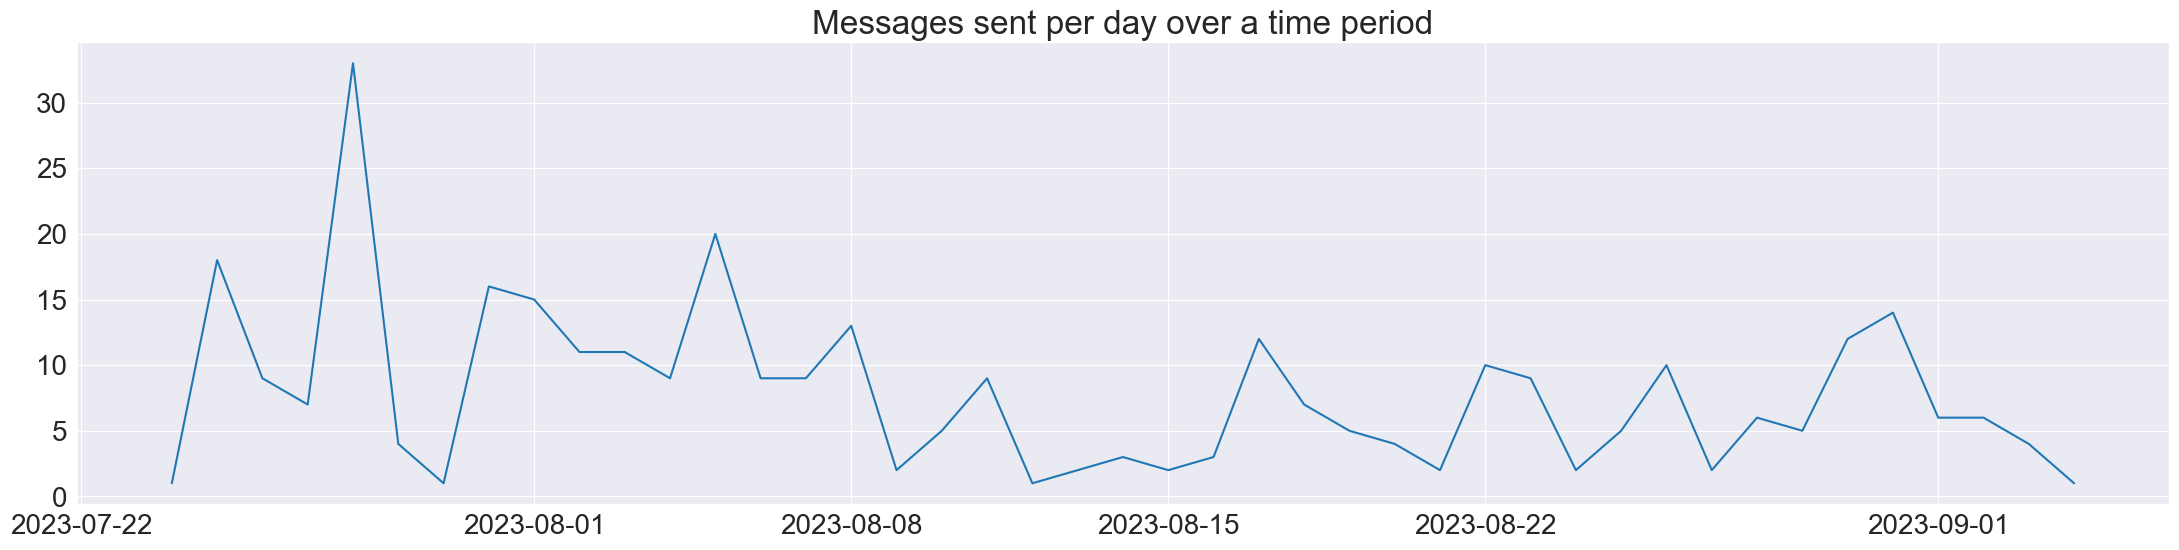

In [20]:

sns.set_style("darkgrid")


import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      


plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');


plt.savefig('msg_plots.svg', format = 'svg')

In [21]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    
top10days.reset_index(inplace=True)           
top10days.drop(columns="index", inplace=True) 
top10days

,date,message_count
0,2023-07-28,33
1,2023-08-05,20
2,2023-07-25,18
3,2023-07-31,16
4,2023-08-01,15
5,2023-08-31,14
6,2023-08-08,13
7,2023-08-30,12
8,2023-08-17,12
9,2023-08-02,11


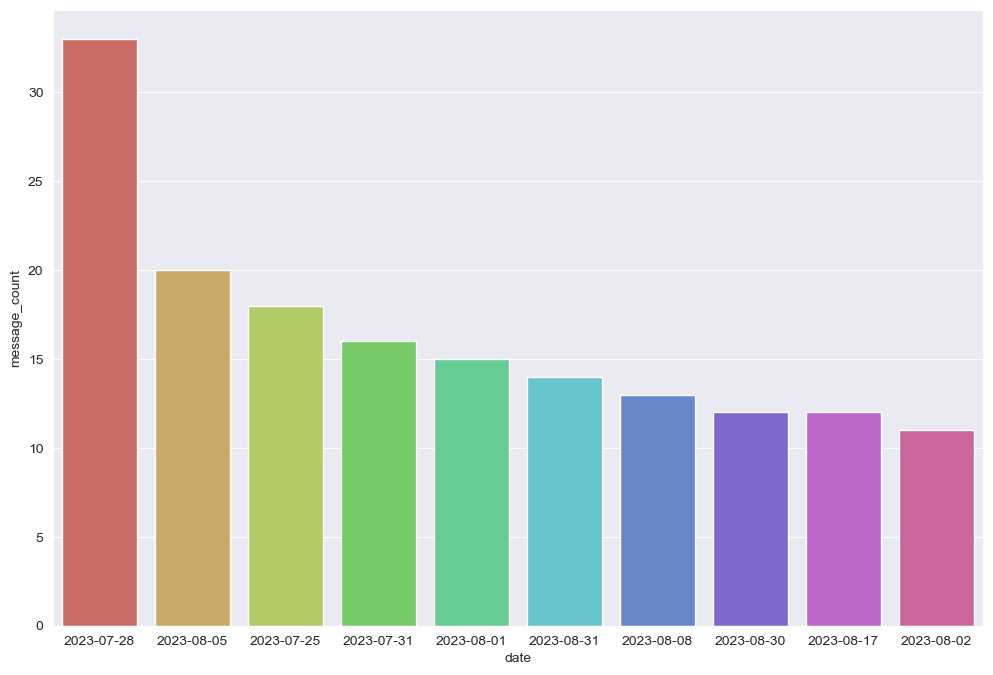

In [22]:

sns.set_style("darkgrid")


import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)


sns.barplot(x='date', y='message_count', data=top10days, palette="hls")


plt.savefig('top10_days.svg', format = 'svg')

In [23]:

print(f"Total number of people who have sent at least one message on the group are {len(df.user.unique()) - 1}")   # `-1` because excluding "group_notficiation"

print(f"Number of people who haven't sent even a single message on the group are {237 - len(df.user.unique()) - 1}")

Total number of people who have sent at least one message on the group are 23
Number of people who haven't sent even a single message on the group are 212


In [24]:
df2 = df.copy()    
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

top10df = top10df.head(10).reset_index()
top10df

,user,message
0,HOD Deepa Mam,120
1,+91 90031 15022,79
2,+91 77085 34032,32
3,Jamunarani Mam,27
4,+91 88837 39337,22
5,+91 86757 30358,19
6,+91 95008 36835,9
7,FF Shabeer,3
8,+91 93421 67228,2
9,FF Akshay Raj,2


In [25]:
top10df['initials'] = ''
for i in range(10):
    top10df.initials[i] = top10df.user[i].split()[0][0] + top10df.user[i].split()[1][0]
    
top10df.initials[7] = "Me"    
top10df.initials[8] = "DT"

In [26]:

import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

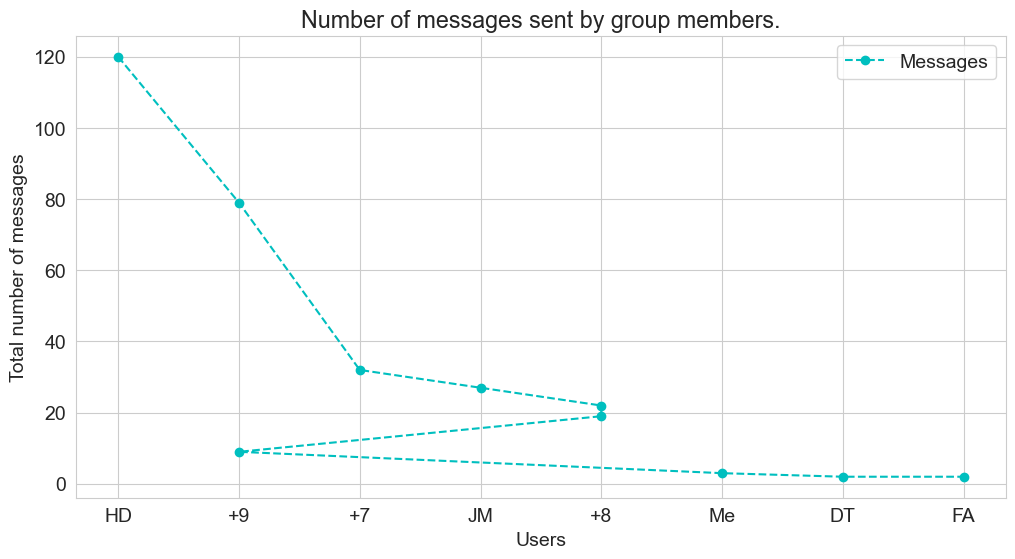

In [27]:

sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))



plt.plot(top10df.initials, top10df.message, 'o--c')  


plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Number of messages sent by group members.")
plt.legend(['Messages']);



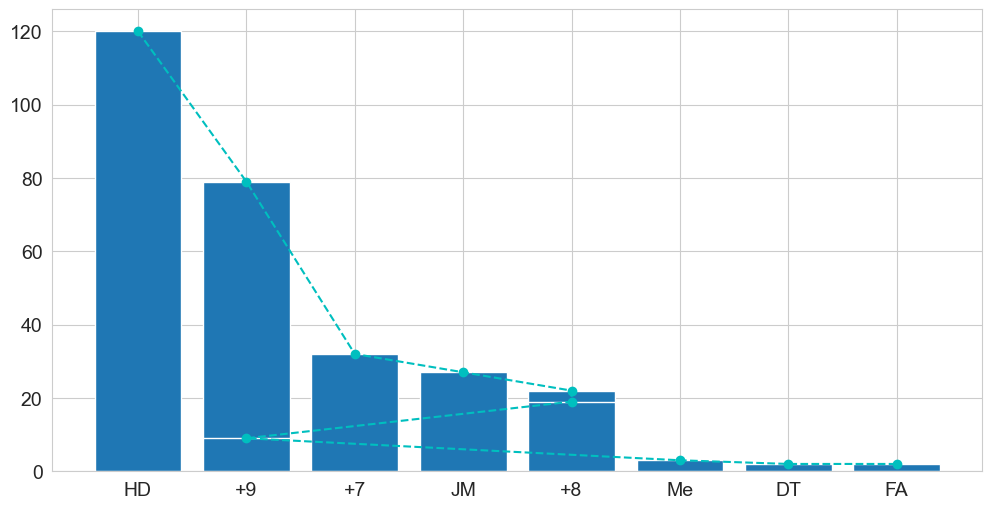

In [28]:

sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))

plt.bar(top10df.initials, top10df.message)   
plt.plot(top10df.initials, top10df.message, 'o--c');   

<Axes: xlabel='initials', ylabel='message'>

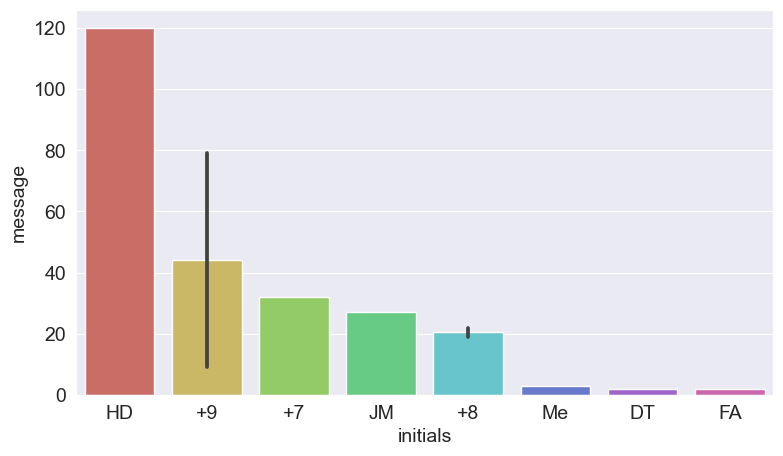

In [29]:

sns.set_style("darkgrid")
sns.barplot(x='initials', y='message', data=top10df, palette="hls")

In [30]:
def get_colors_of_certain_order(names_in_certain_order):
    '''the color of a certain person remains the same, no matter the plot'''
    
    order = list(names_in_certain_order)
    return_list = []
    
    for name in order:
        return_list.append(color_dict[name])
        
    return return_list

{'HD': '#F94144',
 '+9': '#43AA8B',
 '+7': '#F8961E',
 'JM': '#FDC500',
 '+8': '#90BE6D',
 'Me': '#577590',
 'DT': '#6D597A',
 'FA': '#003F88'}

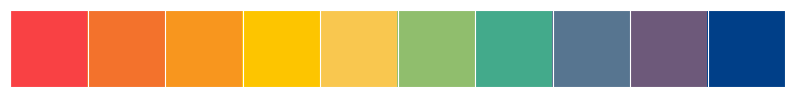

In [31]:
colors = ['#F94144', '#F3722C', '#F8961E', '#FDC500', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A','#003F88']
sns.palplot(colors)    

names = top10df.initials

color_dict = {}
for name, color in zip(names, colors):
    color_dict[name] = color
color_dict

In [32]:

df2['message_length'] = df2['message'].apply(len)


avg_msg_lengths = df2.groupby('user')['message_length'].mean().reset_index().sort_values(by='message_length', ascending=False)

top10df = top10df.merge(avg_msg_lengths, on='user', how='left')


top10df.rename(columns={'message_length': 'avg_message_length'}, inplace=True)


top10df_msg = top10df.sort_values(by='avg_message_length', ascending=False)


print(top10df_msg)

              user  message initials  avg_message_length
6  +91 95008 36835        9       +9          139.444444
5  +91 86757 30358       19       +8           84.368421
4  +91 88837 39337       22       +8           82.318182
1  +91 90031 15022       79       +9           81.772152
3   Jamunarani Mam       27       JM           70.222222
0    HOD Deepa Mam      120       HD           68.016667
2  +91 77085 34032       32       +7           53.031250
7       FF Shabeer        3       Me           38.666667
8  +91 93421 67228        2       DT           20.500000
9    FF Akshay Raj        2       FA            7.500000


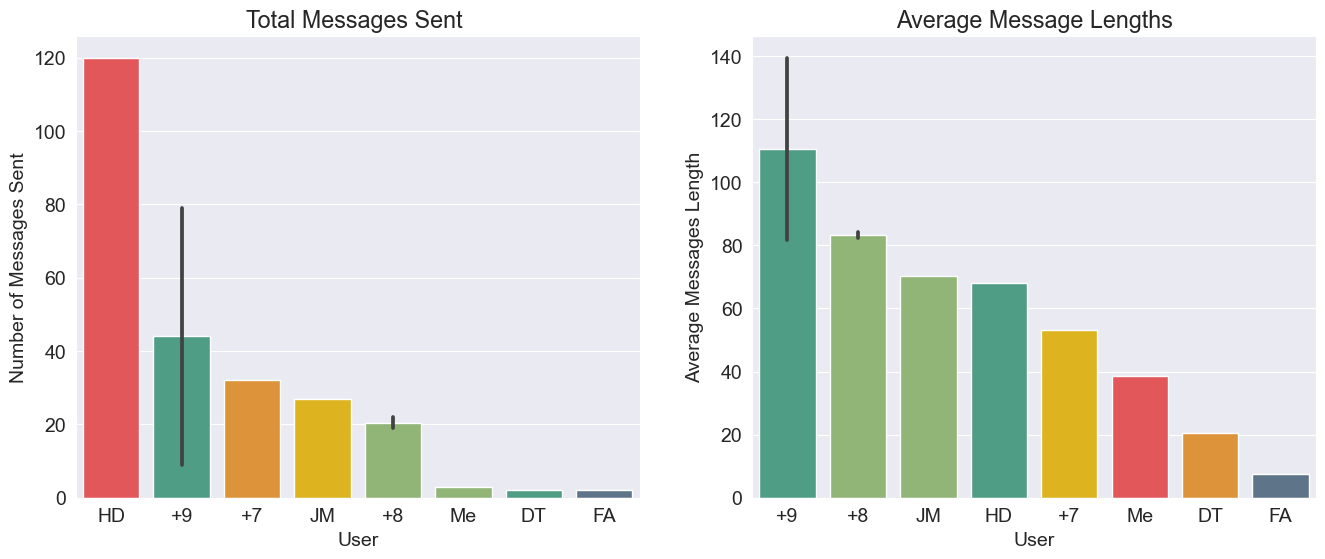

In [33]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("darkgrid")


sns.barplot(x=top10df.initials, y=top10df.message, ax=axes[0], palette=get_colors_of_certain_order(top10df.initials));     # Note: the palette argument;

axes[0].set_title('Total Messages Sent ')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Number of Messages Sent')




sns.barplot(x=top10df_msg.initials,y=top10df_msg.avg_message_length, ax = axes[1], palette = get_colors_of_certain_order(top10df_msg.initials))    # Note: the respective palette argument;

axes[1].set_title('Average Message Lengths')
axes[1].set_xlabel('User');
axes[1].set_ylabel('Average Messages Length');


plt.savefig('top10_msg_plots_diff.svg', format = 'svg')

In [34]:

top10media = df[df.message == '<Media omitted> '].groupby('user').count().sort_values(by="message", ascending = False).head(10)

top10media.drop(columns=['date_time', 'day', 'month', 'year', 'date'], inplace=True)


top10media.rename(columns={"message": "media_sent"}, inplace=True)


top10media.reset_index(inplace=True)

top10media['initials'] = top10media['user'].apply(lambda x: x.split()[0][0] + x.split()[1][0] if len(x.split()) > 1 else x[0])



top10media.initials[2] = "Me"    
top10media.initials[9] = "VR"

print(top10media)

              user  media_sent initials
0    HOD Deepa Mam          39       HD
1  +91 90031 15022          12       +9
2   Jamunarani Mam           9       Me
3  +91 77085 34032           4       +7
4  +91 88837 39337           3       +8
5  +91 95008 36835           2       +9
6  +91 93421 67228           1       +9


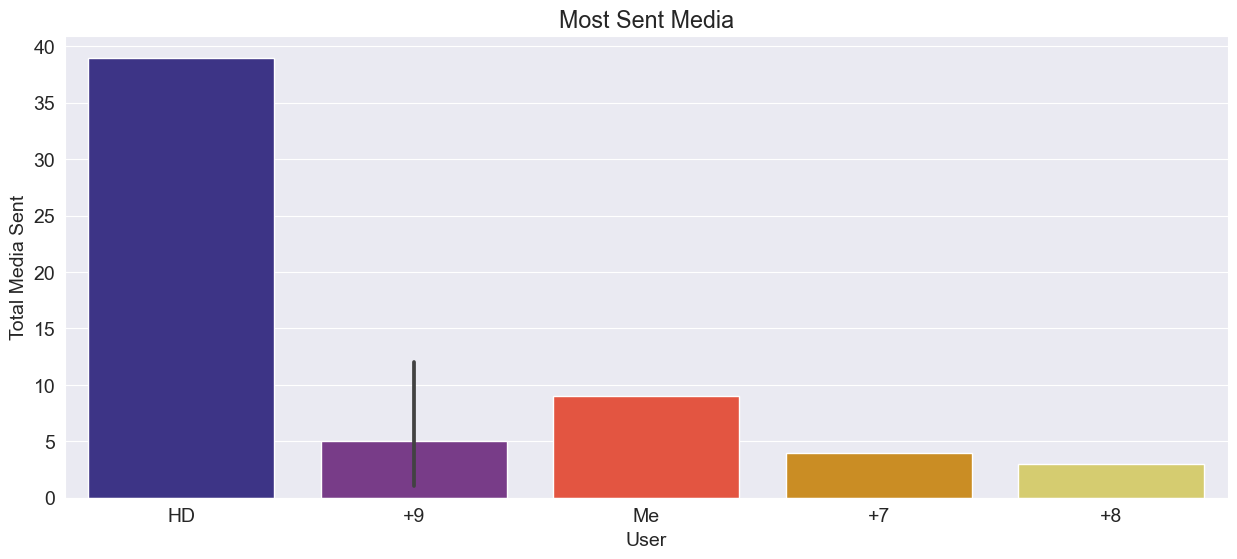

In [35]:

plt.figure(figsize=(15, 6))


sns.set_style("darkgrid")


sns.barplot(x='initials', y='media_sent', data=top10media, palette="CMRmap")


plt.title('Most Sent Media')
plt.xlabel('User')
plt.ylabel('Total Media Sent');


plt.savefig('top10media.svg', format = 'svg')

In [36]:

emoji_ctr = Counter()


emojis_list = list(emoji.EMOJI_DATA.keys())


r = re.compile('|'.join(re.escape(e) for e in emojis_list))


for idx, row in df.iterrows():
    emojis_found = r.findall(row["message"])
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1


print(emoji_ctr.most_common())


[('📌', 61), ('💐', 7), ('👆', 4), ('😡', 4), ('♦️', 4), ('🎊', 4), ('📍', 1), ('🙏', 1), ('💥', 1), ('👇', 1), ('🇮🇳', 1)]


In [37]:
top10emojis = pd.DataFrame()

top10emojis['emoji'] = [''] * 10
top10emojis['emoji_count'] = [0] * 10
top10emojis['emoji_description'] = [''] * 10

i = 0
for item in emoji_ctr.most_common(10):
    
    description = emoji.demojize(item[0])[1:-1]    
    
    
    top10emojis.emoji[i] = item[0]
    top10emojis.emoji_count[i] = int(item[1])
    top10emojis.emoji_description[i] = description
    i += 1

top10emojis

,emoji,emoji_count,emoji_description
0,📌,61,pushpin
1,💐,7,bouquet
2,👆,4,backhand_index_pointing_up
3,😡,4,enraged_face
4,♦️,4,diamond_suit
5,🎊,4,confetti_ball
6,📍,1,round_pushpin
7,🙏,1,folded_hands
8,💥,1,collision
9,👇,1,backhand_index_pointing_down


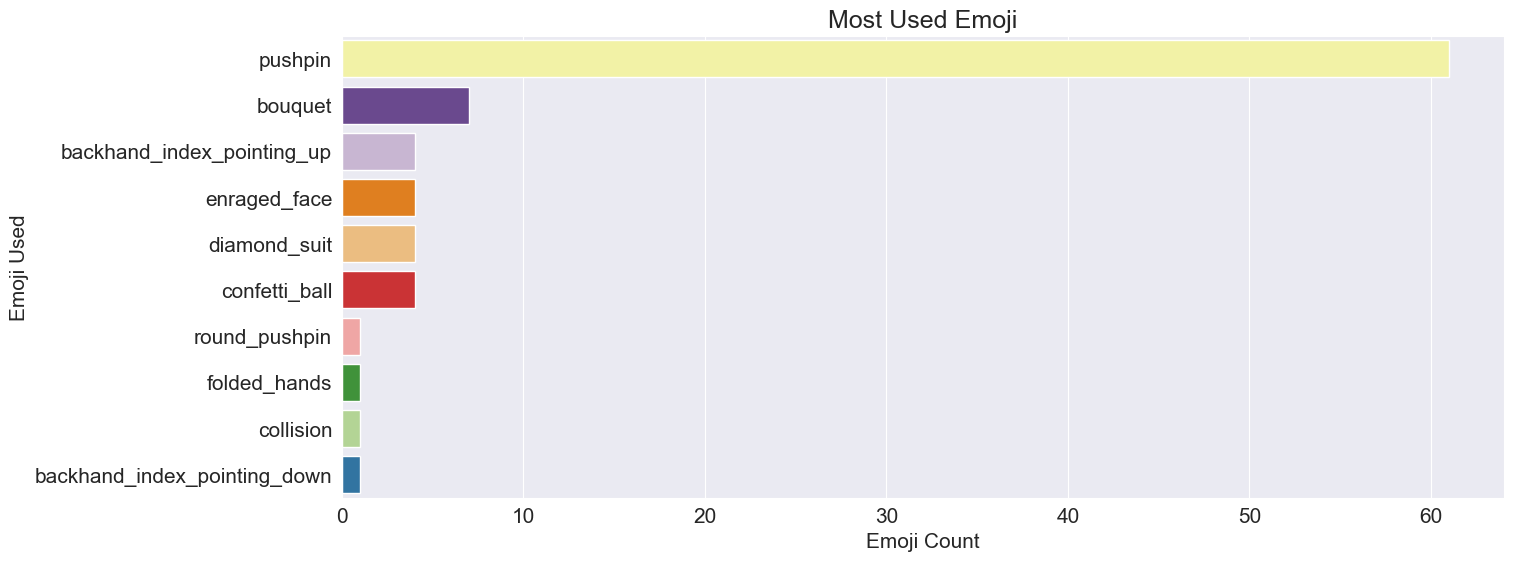

In [38]:

plt.figure(figsize=(15, 6))


import matplotlib
matplotlib.rcParams['font.size'] = 15


sns.set_style("darkgrid")
sns.barplot(x='emoji_count', y='emoji_description', data=top10emojis, palette='Paired_r')


plt.title('Most Used Emoji')
plt.xlabel('Emoji Count')
plt.ylabel('Emoji Used');


plt.savefig('top10emoji.svg', format = 'svg')

In [39]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]    

df3['hour'] = df3['date_time'].apply(lambda x: x.hour)

grouped_by_time = df3.groupby('hour').sum().reset_index().sort_values(by = 'hour')

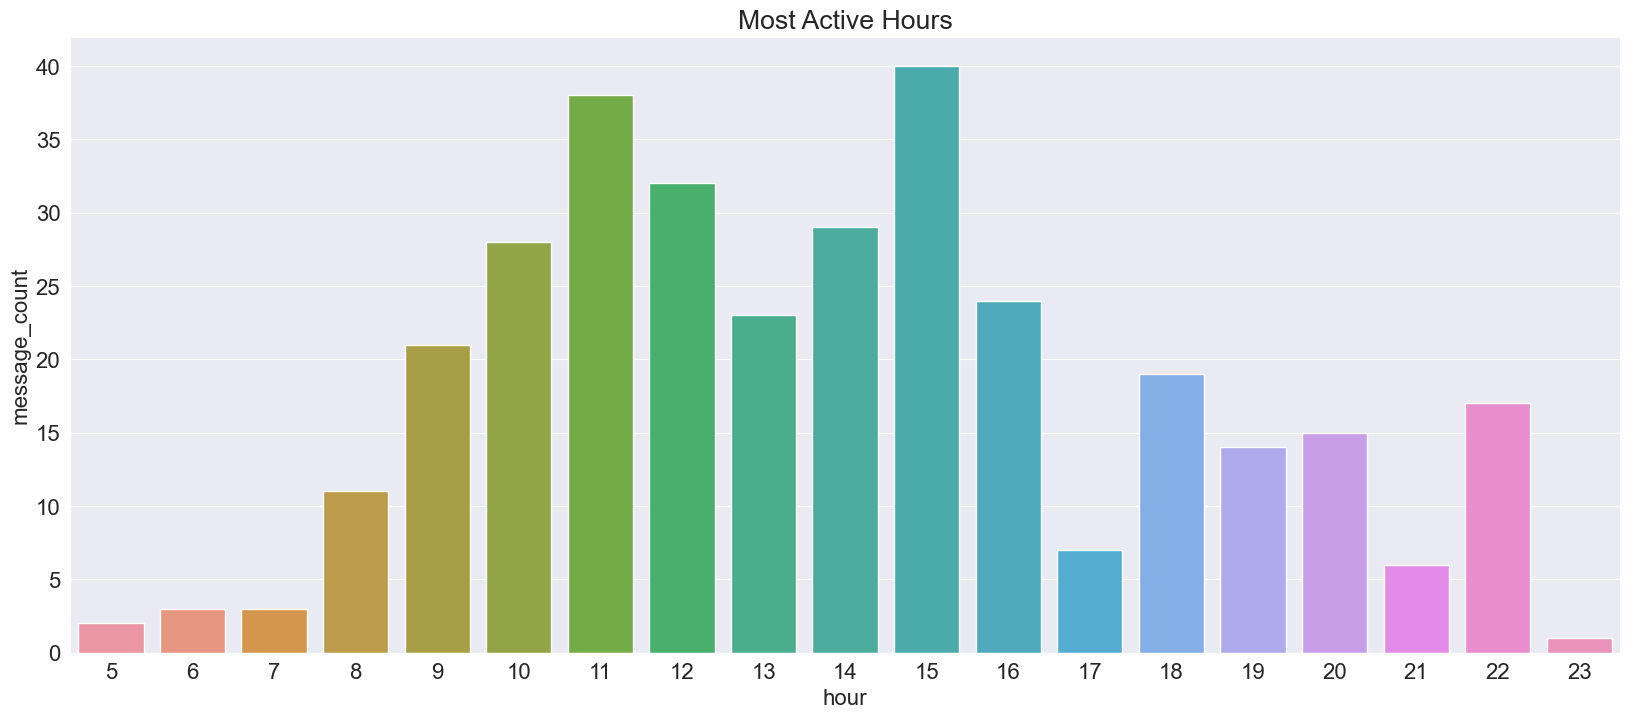

In [40]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 8)

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(x='hour', y='message_count', data=grouped_by_time)
plt.title('Most Active Hours');

# Saving the plots;
plt.savefig('most_active_hours.svg', format = 'svg')

In [41]:

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

grouped_by_day = df3.groupby('day').sum().reset_index()[['day', 'message_count']]


months = ['May', 'Jun', 'Jul', 'Aug', 'Sep']   

grouped_by_month = df3.groupby('month').sum().reset_index()[['month', 'message_count']]

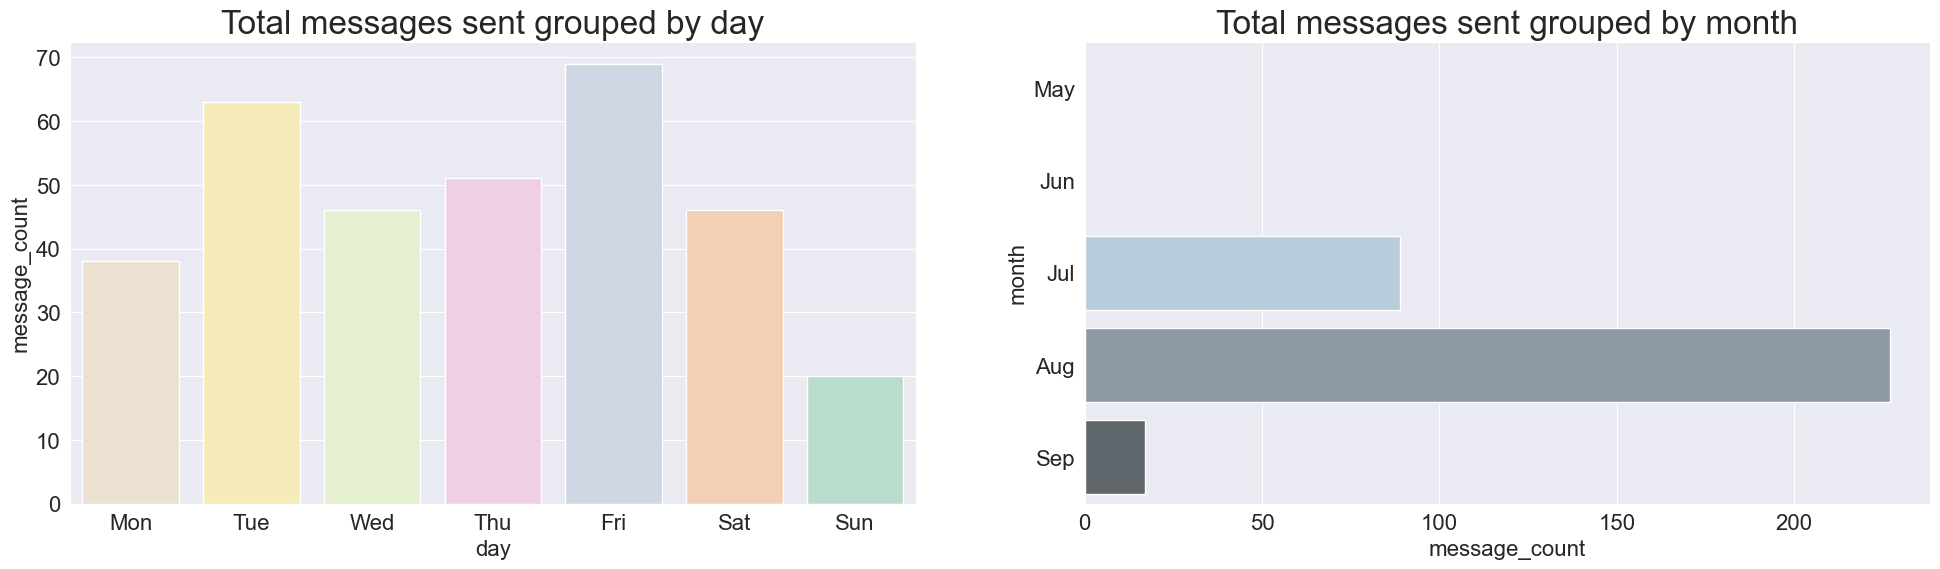

In [42]:
fig, axs = plt.subplots(1, 2, figsize = (24, 6))

import matplotlib
matplotlib.rcParams['font.size'] = 20


sns.set_style("darkgrid")


sns.barplot(x='day', y='message_count', data=grouped_by_day, order=days, ax=axs[0], palette='Pastel2_r')
axs[0].set_title('Total messages sent grouped by day')


sns.barplot(y='month', x='message_count', data=grouped_by_month, order=months, ax=axs[1], palette='Pastel1_d')
axs[1].set_title('Total messages sent grouped by month');


plt.savefig('days_and_month.svg', format = 'svg')

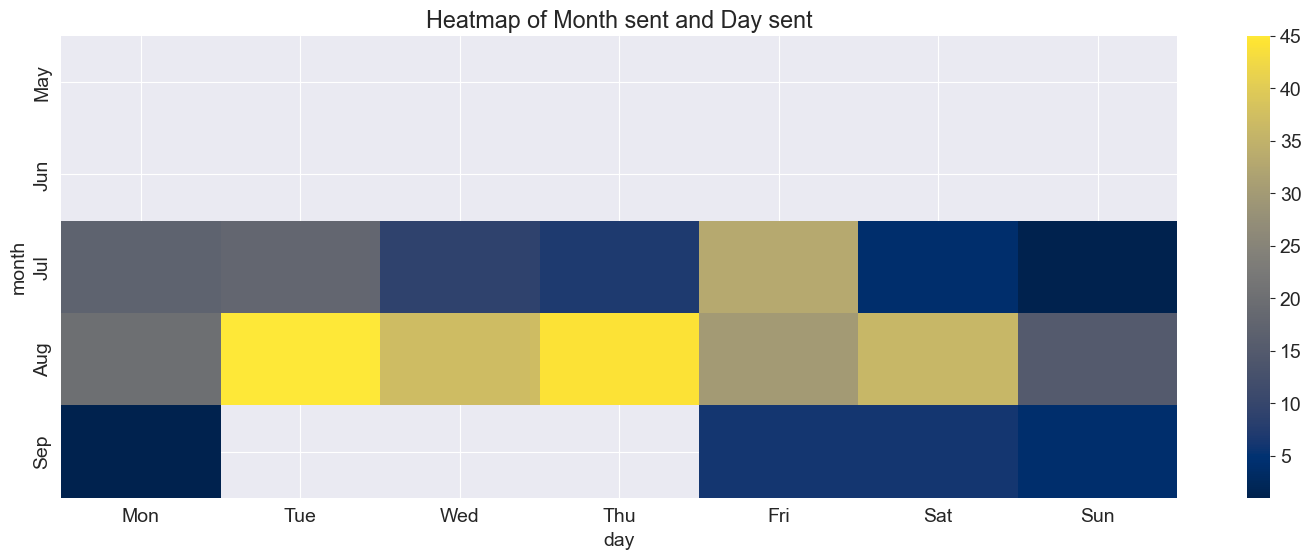

In [43]:

import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)


sns.set_style("darkgrid")


grouped_by_month_and_day = df3.groupby(['month', 'day']).sum().reset_index()[['month', 'day', 'message_count']]


pt = grouped_by_month_and_day.pivot_table(index = 'month', columns = 'day', values = 'message_count').reindex(index = months, columns = days)


sns.heatmap(pt, cmap = 'cividis');
plt.title('Heatmap of Month sent and Day sent');

plt.savefig('month_day_heatmap.svg', format = 'svg')

In [44]:
comment_words = ' '


stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])



for val in df3.message.values:
    

    val = str(val) 
    
    
    tokens = val.split() 
    
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 

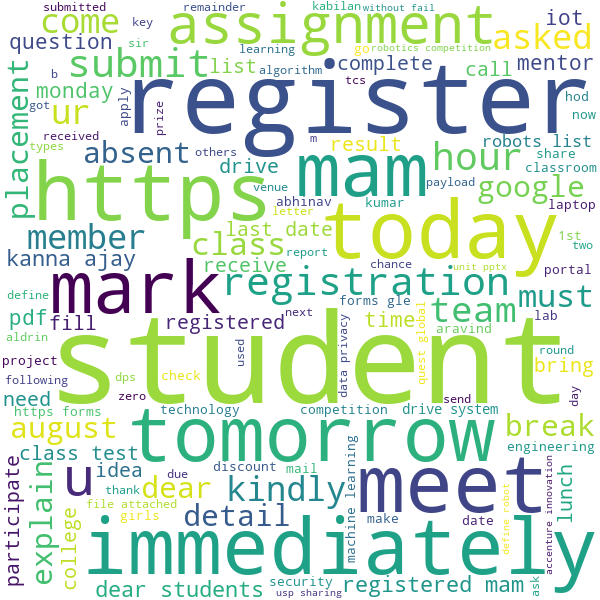

In [45]:
wordcloud.to_image()